# Using Decision Trees

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = yf.Ticker("GOOG").history(period='10y')
df = df.dropna()
df.head()

Open       High        Low      Close  \
Date                                                                    
2013-05-03 00:00:00-04:00  20.845865  21.090946  20.821955  21.064047   
2013-05-06 00:00:00-04:00  21.127310  21.465792  21.127310  21.458319   
2013-05-07 00:00:00-04:00  21.494682  21.516102  21.187334  21.350721   
2013-05-08 00:00:00-04:00  21.344994  21.765417  21.243126  21.759192   
2013-05-09 00:00:00-04:00  21.689701  21.909378  21.624695  21.705643   

                              Volume  Dividends  Stock Splits  
Date                                                           
2013-05-03 00:00:00-04:00  100880714        0.0           0.0  
2013-05-06 00:00:00-04:00   85973045        0.0           0.0  
2013-05-07 00:00:00-04:00   78653713        0.0           0.0  
2013-05-08 00:00:00-04:00   99102072        0.0           0.0  
2013-05-09 00:00:00-04:00   88353936        0.0           0.0

In [27]:
df = df.reset_index()
df.shape

(2517, 8)

In [28]:
df.head()

Date       Open       High        Low      Close  \
0 2013-05-03 00:00:00-04:00  20.845865  21.090946  20.821955  21.064047   
1 2013-05-06 00:00:00-04:00  21.127310  21.465792  21.127310  21.458319   
2 2013-05-07 00:00:00-04:00  21.494682  21.516102  21.187334  21.350721   
3 2013-05-08 00:00:00-04:00  21.344994  21.765417  21.243126  21.759192   
4 2013-05-09 00:00:00-04:00  21.689701  21.909378  21.624695  21.705643   

      Volume  Dividends  Stock Splits  
0  100880714        0.0           0.0  
1   85973045        0.0           0.0  
2   78653713        0.0           0.0  
3   99102072        0.0           0.0  
4   88353936        0.0           0.0

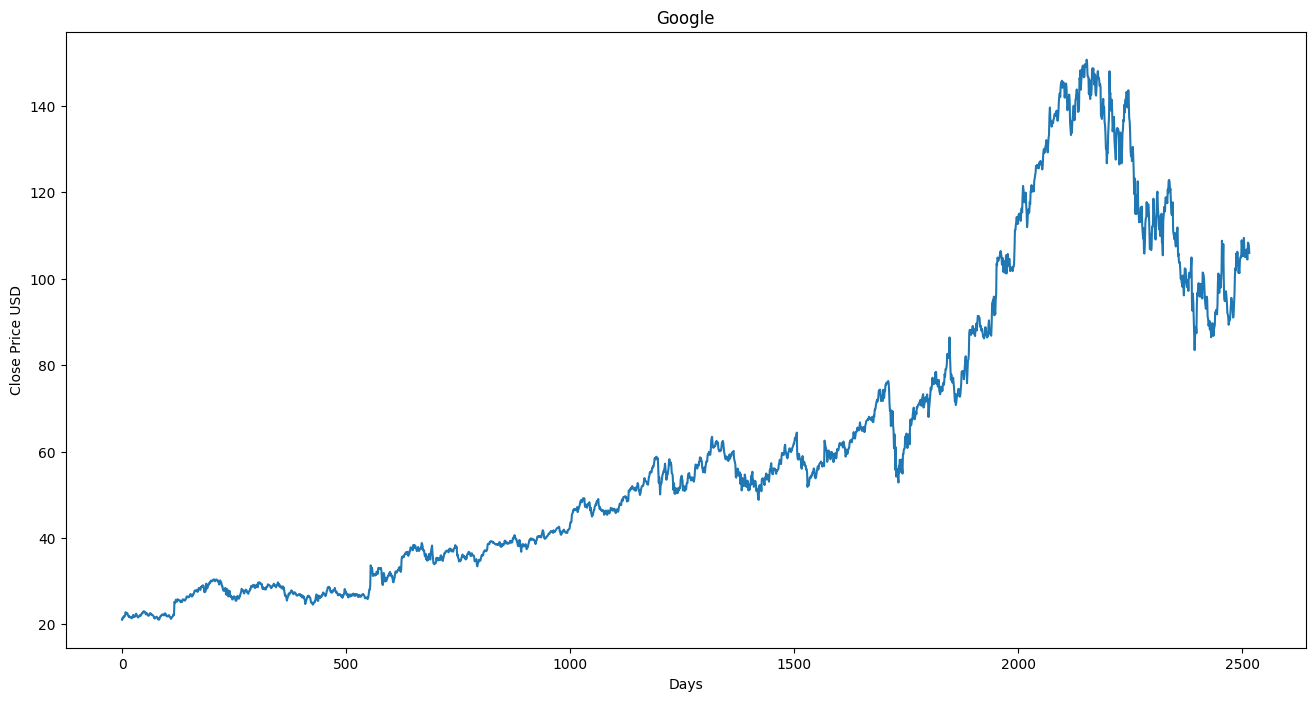

In [29]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [30]:
#Get the close price
df = df[['Close']]
df.head(8)

Close
0  21.064047
1  21.458319
2  21.350721
3  21.759192
4  21.705643
5  21.923574
6  21.856327
7  22.094685

In [31]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction']= df[['Close']].shift(-future_days)
df.tail(8)

Close  Prediction
2509  105.910004         NaN
2510  106.779999         NaN
2511  104.610001         NaN
2512  104.449997         NaN
2513  108.370003         NaN
2514  108.220001         NaN
2515  107.709999         NaN
2516  105.980003         NaN

In [32]:
import numpy as np
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 21.06404686]
 [ 21.45831871]
 [ 21.35072136]
 ...
 [106.26000214]
 [106.05999756]
 [103.05999756]]


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [33]:
#Create the target data set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 22.17239189  21.91311455  21.71809578 ... 108.22000122 107.70999908
 105.98000336]


In [34]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [39]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression

#Create the models 
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [40]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


array([[ 92.05000305],
       [ 91.80000305],
       [ 91.06999969],
       [ 89.34999847],
       [ 90.09999847],
       [ 90.30000305],
       [ 90.51000214],
       [ 92.30999756],
       [ 94.01999664],
       [ 95.58000183],
       [ 94.16999817],
       [ 94.65000153],
       [ 92.66000366],
       [ 91.01000214],
       [ 91.66000366],
       [ 94.25      ],
       [ 96.55000305],
       [101.06999969],
       [102.45999908],
       [101.93000031],
       [105.83999634],
       [104.22000122],
       [106.26000214],
       [106.05999756],
       [103.05999756]])

In [41]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future) 
print(tree_prediction) 
print() 
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction) 

[ 94.58999634 101.20850372 101.31999969  97.09999847 104.91000366
  97.94999695 104.94999695 108.90000153  89.34999847 106.12000275
  90.86000061 108.19000244 109.45999908  87.72000122 105.12000275
 105.01999664 105.90000153 113.3635025  106.77999878 104.61000061
 104.44999695 108.37000275 108.22000122 107.70999908 105.98000336]

[ 92.65998041  92.41272895  91.69075136  89.98966011  90.73141449
  90.92922019  91.13691051  92.91711649  94.60831557  96.15116982
  94.75666796  95.23139408  93.26327457  91.63141343  92.27426873
  94.83579024  97.11050669 101.58080977 102.95552728 102.4313554
 106.29836431 104.69617968 106.7137525  106.5159468  103.54892928]



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


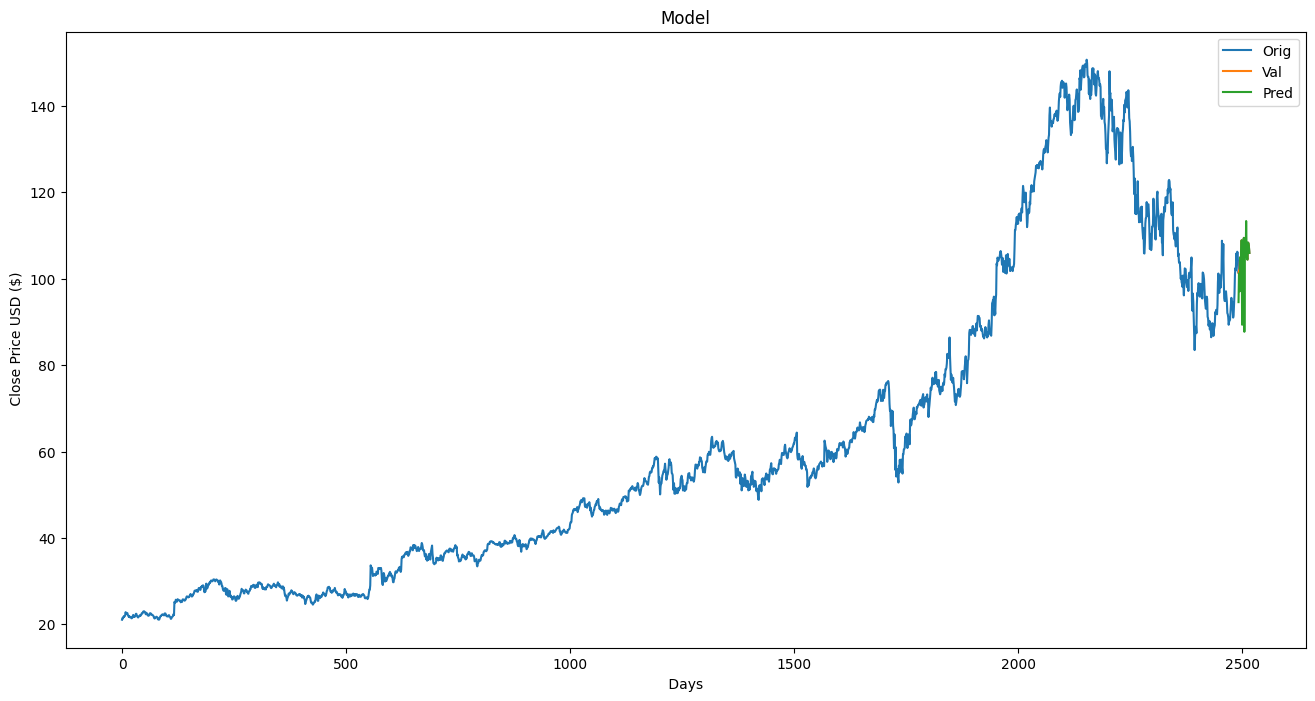

In [42]:
#Visualize the data 
predictions = tree_prediction

valid = df[X.shape[0]:] 
valid['Predictions'] = predictions
plt.figure(figsize=(16,8)) 
plt.title('Model') 
plt.xlabel(' Days ') 
plt.ylabel(' Close Price USD ($)') 
plt.plot(df['Close'])  
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig' , 'Val' , 'Pred']) 
plt.show()  


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


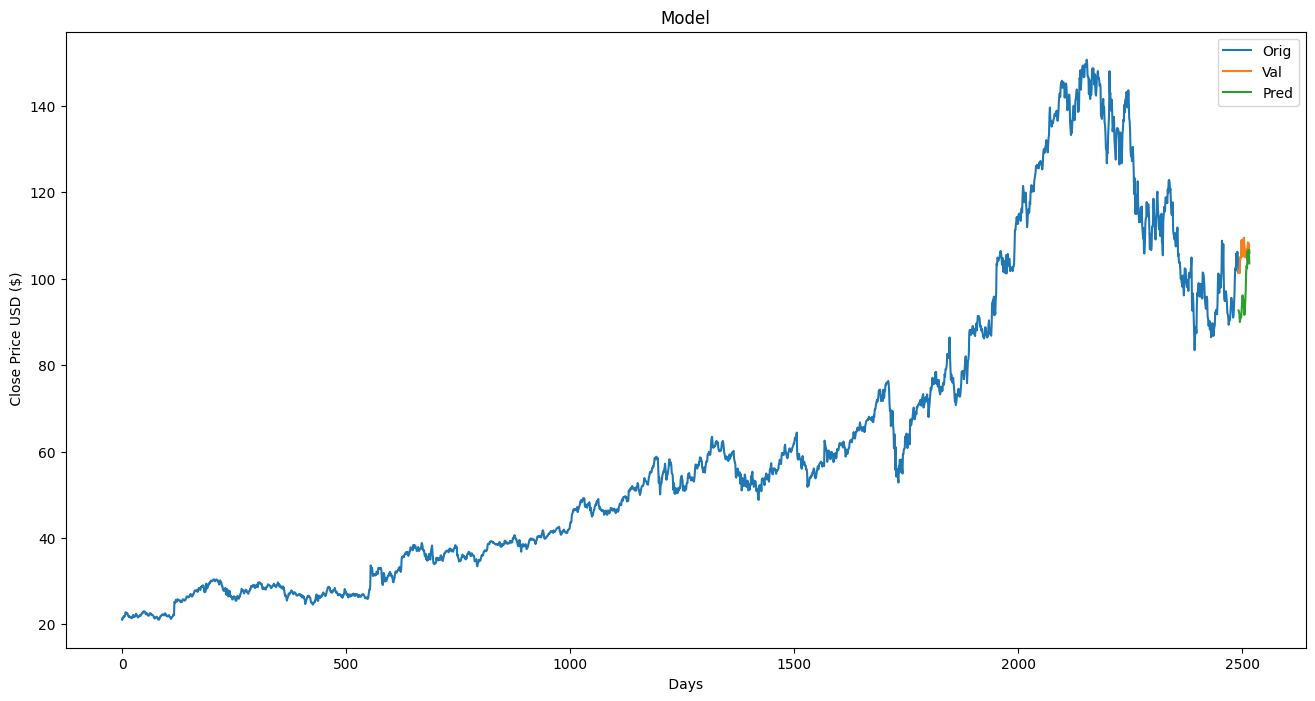

In [43]:
#Visualize the data 
predictions = lr_prediction

valid = df[X.shape[0]:] 
valid['Predictions'] = predictions
plt.figure(figsize=(16,8)) 
plt.title('Model') 
plt.xlabel(' Days ') 
plt.ylabel(' Close Price USD ($)') 
plt.plot(df['Close'])  
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig' , 'Val' , 'Pred']) 
plt.show()   

In [44]:
# plot tree
plt.figure(figsize=(100,100))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show()

In [45]:
y_pred_tree=tree.predict(x_test)
y_pred_lr=lr.predict(x_test)
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(mse_lr,mse_tree)

30.565151167956845 49.75785819380852


# Using Random Forest Regressor

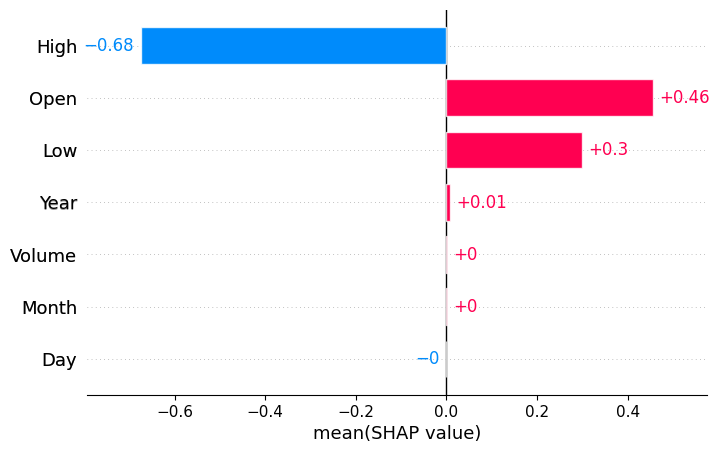

In [46]:
import yfinance as yf
import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Download Google stock data
google = yf.Ticker("GOOGL")
data = google.history(period="10y")

# Create features and target
data['Date'] = pd.to_datetime(data.index)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day']
target = 'Close'
X = data[features]
y = data[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Explain the model predictions using shap
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)

# Plot the feature importance using shap
shap.plots.bar(shap_values.mean(0), show=False)


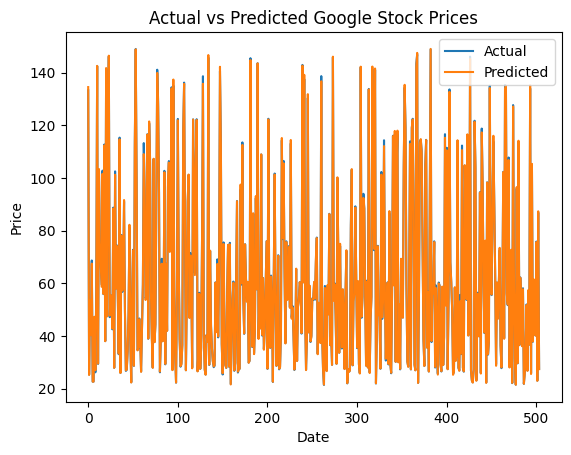

In [48]:
# Plot actual vs predicted values
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Google Stock Prices')
plt.legend()
plt.show()

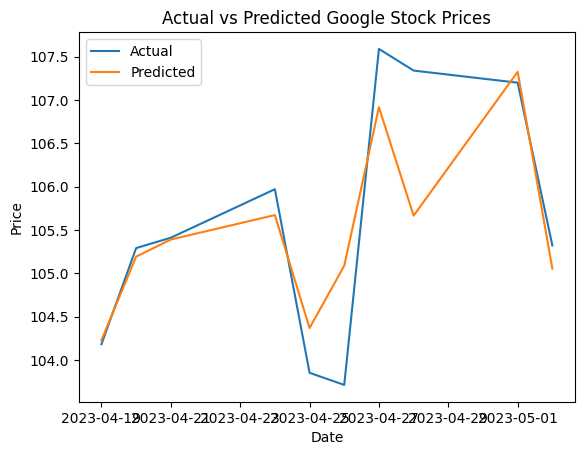

In [49]:
# Plot the actual and predicted values for the last 10 days
last_10_days = data.iloc[-10:]
last_10_days_pred = rf.predict(last_10_days[features])
plt.plot(last_10_days.index, last_10_days[target], label='Actual')
plt.plot(last_10_days.index, last_10_days_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Google Stock Prices')
plt.legend()
plt.show()

In [50]:
mse_rf = mean_squared_error(y_test, y_pred)

print(mse_rf)

0.4346802867999816


# Using Neural Networks

In [18]:
import pandas as pd
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data = yf.Ticker("GOOG").history(period='10y')
data = data['Close'].values.reshape(-1, 1)

In [19]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Create time series sequences
seq_len = 60
sequences = []
for i in range(seq_len, len(data)):
    sequences.append(data[i-seq_len:i, 0])
sequences = np.array(sequences)

# Split data into training and testing sets
train_size = int(0.8 * len(sequences))
train_data = sequences[:train_size, :]
test_data = sequences[train_size:, :]

# Split training and testing data into input and output sets
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Reshape input sets to fit LSTM input shape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [20]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_len-1, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam())

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
62/62 - 11s - loss: 0.0062 - val_loss: 0.0030 - 11s/epoch - 171ms/step
Epoch 2/50
62/62 - 4s - loss: 0.0010 - val_loss: 0.0044 - 4s/epoch - 60ms/step
Epoch 3/50
62/62 - 4s - loss: 9.1935e-04 - val_loss: 0.0019 - 4s/epoch - 64ms/step
Epoch 4/50
62/62 - 4s - loss: 0.0011 - val_loss: 0.0051 - 4s/epoch - 61ms/step
Epoch 5/50
62/62 - 4s - loss: 9.6123e-04 - val_loss: 0.0026 - 4s/epoch - 60ms/step
Epoch 6/50
62/62 - 4s - loss: 8.2810e-04 - val_loss: 0.0017 - 4s/epoch - 61ms/step
Epoch 7/50
62/62 - 4s - loss: 7.6078e-04 - val_loss: 0.0039 - 4s/epoch - 62ms/step
Epoch 8/50
62/62 - 4s - loss: 6.9958e-04 - val_loss: 0.0016 - 4s/epoch - 62ms/step
Epoch 9/50
62/62 - 4s - loss: 6.7990e-04 - val_loss: 0.0017 - 4s/epoch - 62ms/step
Epoch 10/50
62/62 - 4s - loss: 7.5258e-04 - val_loss: 0.0016 - 4s/epoch - 63ms/step
Epoch 11/50
62/62 - 4s - loss: 6.9750e-04 - val_loss: 0.0038 - 4s/epoch - 62ms/step
Epoch 12/50
62/62 - 4s - loss: 6.9508e-04 - val_loss: 0.0018 - 4s/epoch - 71ms/step
Epoch 13/5

Train MSE: 0.0002
Test MSE: 0.0009
16/16 [==============================] - 0s 21ms/step
Train RMSE: 1.91
Test RMSE: 3.96


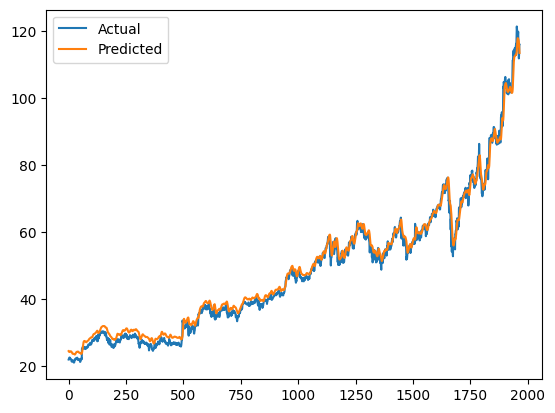

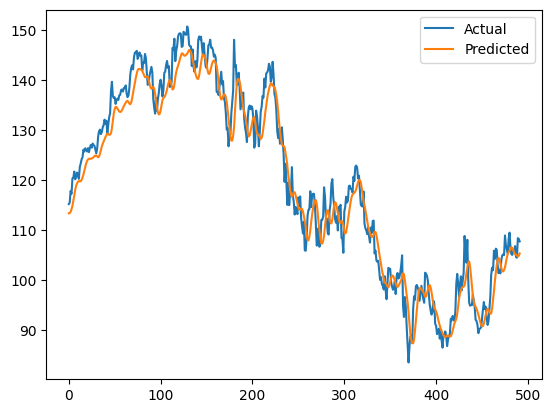

In [21]:
# Evaluate model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f'Train MSE: {train_score:.4f}')
print(f'Test MSE: {test_score:.4f}')

# Make predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse scale predictions and actual values
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

# Plot actual vs predicted stock prices for training set
plt.plot(y_train, label='Actual')
plt.plot(train_pred, label='Predicted')
plt.legend()
plt.show()

# Plot actual vs predicted stock prices for testing set
plt.plot(y_test, label='Actual')
plt.plot(test_pred, label='Predicted')
plt.legend()
plt.show()

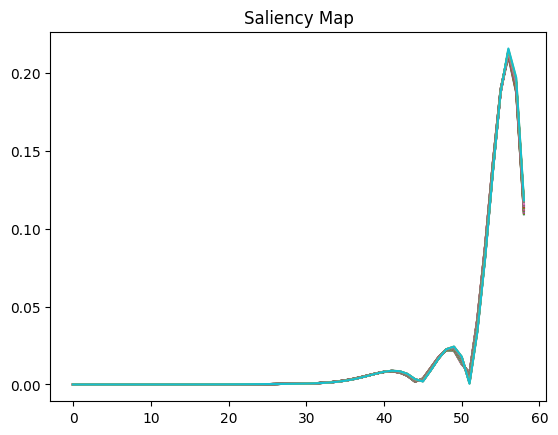

In [22]:
## Choose a test sample to plot the saliency map for
saliency = []

for i in range(0, 50):
    sample = X_test[i].reshape(1, X_test.shape[1], 1)
    #sample = x_test[0]
    sample = tf.convert_to_tensor(sample)

    # Get the predictions for the sample
    predictions = model(sample)

    # Define a function to compute the saliency map
    def compute_saliency_map(model, sample, class_index):
        with tf.GradientTape() as tape:
            tape.watch(sample)
            output = model(sample)
            loss = output[0, class_index]
        grads = tape.gradient(loss, sample)
        return tf.abs(grads)

    # Compute the saliency map
    saliency_map = compute_saliency_map(model, sample, 0)
    saliency.append(saliency_map)

    # Plot the saliency map
    plt.plot(saliency_map[0, :, 0])
    plt.title('Saliency Map')
plt.show()

In [23]:
for layer in model.layers:
        if "LSTM" in str(layer):
            weightLSTM = layer.get_weights()
warr,uarr, barr = weightLSTM
warr.shape,uarr.shape,barr.shape

#warr is a numpy array of weights for inputs
#uarr is a numpy array of weights for hidden units
#barr is a numpy array of bias

((50, 200), (50, 200), (200,))

In [24]:
# Get the number of layers in the LSTM model
num_layers = len(model.layers)
print("Number of layers in the LSTM model:", num_layers)

Number of layers in the LSTM model: 7


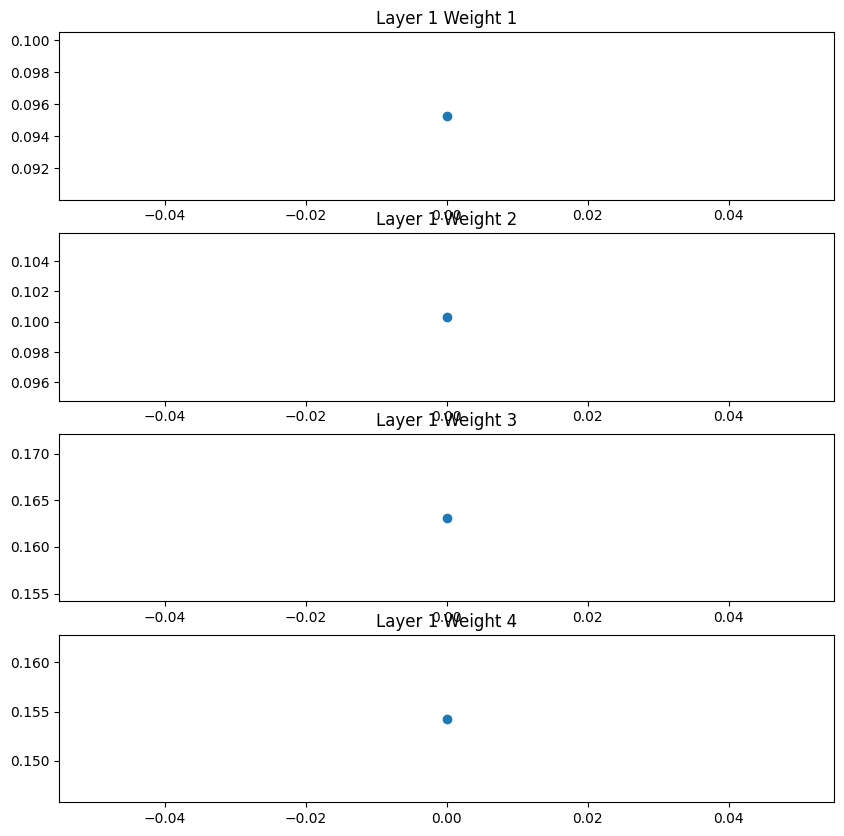

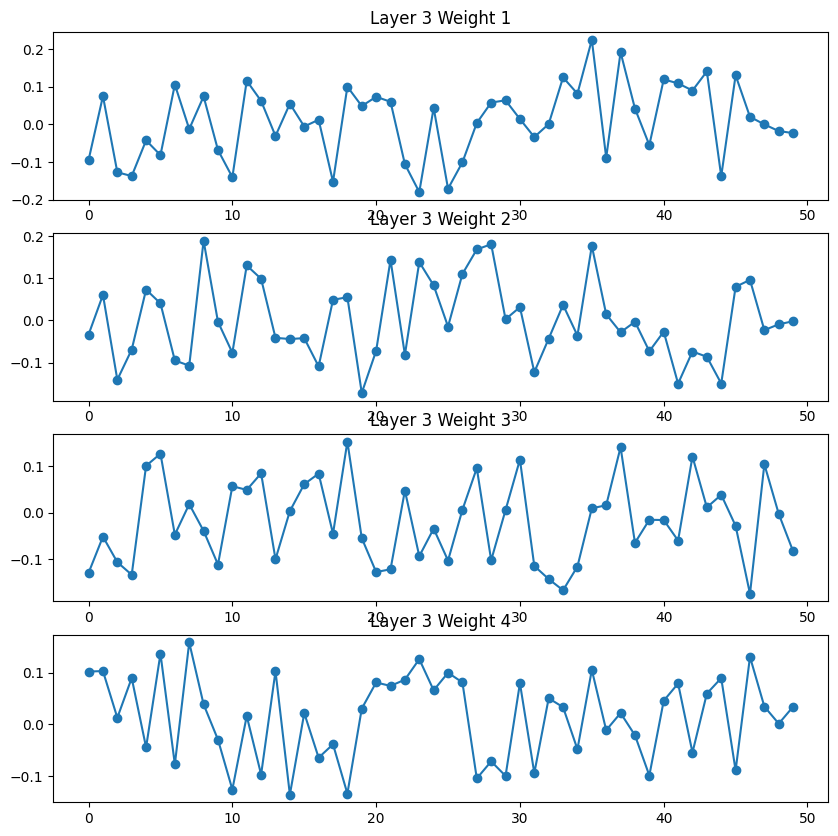

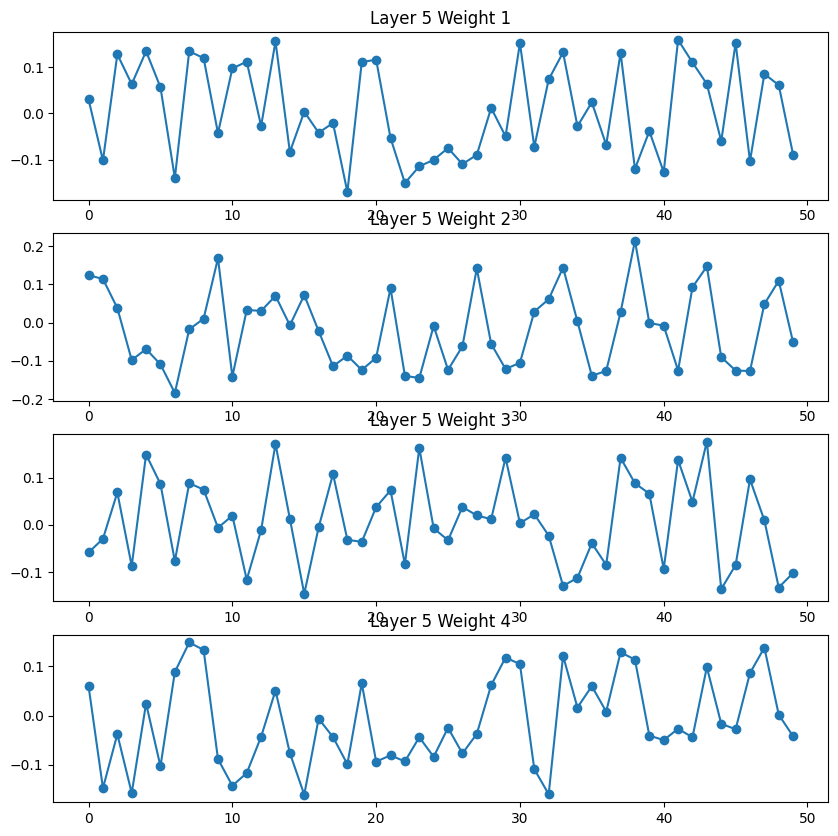

In [25]:
# plot the weights of the LSTM layers
for i, layer in enumerate(model.layers):
    if 'lstm' in layer.name:
        weights = layer.get_weights()[0]
        fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
        for j in range(4):
            axs[j].plot(weights[:,j], 'o-')
            axs[j].set_title('Layer ' + str(i+1) + ' Weight ' + str(j+1))
        plt.show()